# Lab 2 : Decision Trees, Forests and Logistic Regression

---


Total Points: **50**

Tentative Weightage : **5%**

Submission Deadline :  **5th March 2021, 23:59 hours**

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x or PyTorch**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **inferences** (preferably in a text block) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. In case of any queries regarding Lab 2, please mail 2017csz0005@iitrpr.ac.in


# Dataset

###About the Dataset
A malware classifier dataset built with header fields’ values of portable executable files. You can read more about the dataset [here](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 


###Tasks on Dataset Exploration


---


Total for this subsection : **5 points**


---


1. Download and extract the 'Malwares' dataset from this [link](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 
2. Take a look at the downloaded dataset and explore the various columns/headers present in the dataset. **Note: You are to use the *raw* file throughout this assignment and not the intergrated* one**.   
3. Load the dataset using the pandas library. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). (**1 point**)
4. Report the total number of samples and the total number of columns in the dataset. (**1 point**)
5. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. (**1 point**)
6. Plot a bar chart showing the number of samples with the malware present and not present. (**1 point**)
7. Split the dataset into Train and Test sets in a 80:20 ratio. (**1 point**)

In [1]:
# Perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#importing seaborn for plotting.
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

#For ignoring the warning received while plotting.
import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip /content/data_folder.zip

Archive:  /content/data_folder.zip
  inflating: ClaMP_Integrated-5184.csv  
  inflating: ClaMP_Raw-5184.csv      


In [3]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

# from google.colab import drive
# drive.mount('/content/MyDrive', force_remount = True)

In [4]:
# Please provide the path where ClaMP_Raw-5184.csv has been stored 
csv_file_path = "/content/ClaMP_Raw-5184.csv"

In [5]:
# Load the data from csv file into a data frame (1 point)
# Please insert your code here
data = pd.read_csv('/content/ClaMP_Raw-5184.csv')
data.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_res,e_oemid,e_oeminfo,e_res2,e_lfanew,Machine,NumberOfSections,CreationYear,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,256,332,4,2006,0,0,224,8450,267,8,0,1100288,225792,0,1069880,4096,1110016,1184890880,4096,512,4,0,0,0,5,1,1335296,1024,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,184,332,4,1999,0,0,224,8462,267,5,10,4096,2560,0,7680,4096,8192,268435456,4096,512,4,0,0,0,4,0,20480,1024,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,272,332,5,2012,0,0,224,8450,267,9,0,27648,20480,0,28859,4096,32768,268435456,4096,512,5,0,0,0,5,0,61440,1024,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,184,332,1,2011,0,0,224,8450,267,9,0,0,87552,0,0,4096,4096,268435456,4096,512,6,1,6,1,5,0,94208,512,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,NaN,0,0,NaN,224,332,5,2012,0,0,224,258,267,10,10,11776,36352,0,13379,4096,16384,4194304,4096,512,6,2,6,2,6,2,57344,1024,69089,2,33088,262144,8192,1048576,4096,0,16,0


In [6]:
# Print the number of instances and attributes in the loaded data frame (1 point)
# Please insert your code here
print(f"Number of instances: {data.shape[0]}")
print(f"Number of attributes: {data.shape[1]}")

Number of instances: 5184
Number of attributes: 56


In [7]:
# Drop the columns with NaN values (0.5 points)
# Please insert your code here
data.dropna(axis=1, inplace=True)

In [8]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
# Please insert your code here
print(f"Number of instances: {data.shape[0]}")
print(f"Number of attributes: {data.shape[1]}")

Number of instances: 5184
Number of attributes: 54


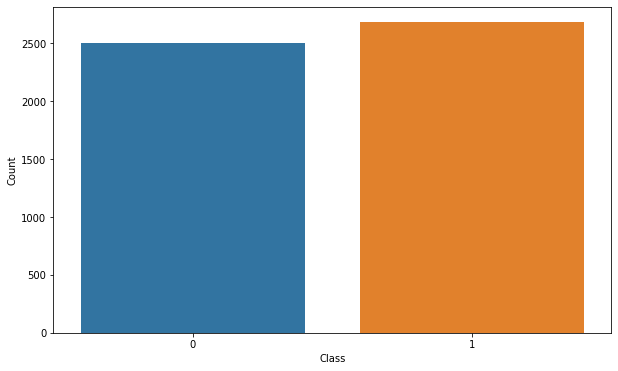

In [9]:
# Plot a bar chart showing the number of samples with the malware present and not present (1 point)
# Please insert your code here
count_ = [data[data['class'] == 0].shape[0], data[data['class'] == 1].shape[0]]
plt.figure(figsize=(10,6))
sns.barplot(x = data['class'].unique(), y = count_)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show();

#0-->Absent
#1-->Present

In [10]:
#Split the dataset into Train and Test sets in a 80:20 ratio (1 point)
# Please insert your code here
X = data.drop('class', axis=1)
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify = Y,random_state=101)

#random_state: so that the split data remains same.
##stratify: splitting is in same proportion in both test and train data. This is done so that no bias shall takes place in our training data.

# Visualizing a Decision Tree


---
Total for this subsection : **3 points**


---



Learn a decision tree classifier which accomodates at least 1000 samples per leaf node based on the train set. Note that this constraint on number of samples per leaf node is set so that the learned tree can be visualized. The tree learned may not be an optimal. Visualize the decision tree learned with such a constraint.

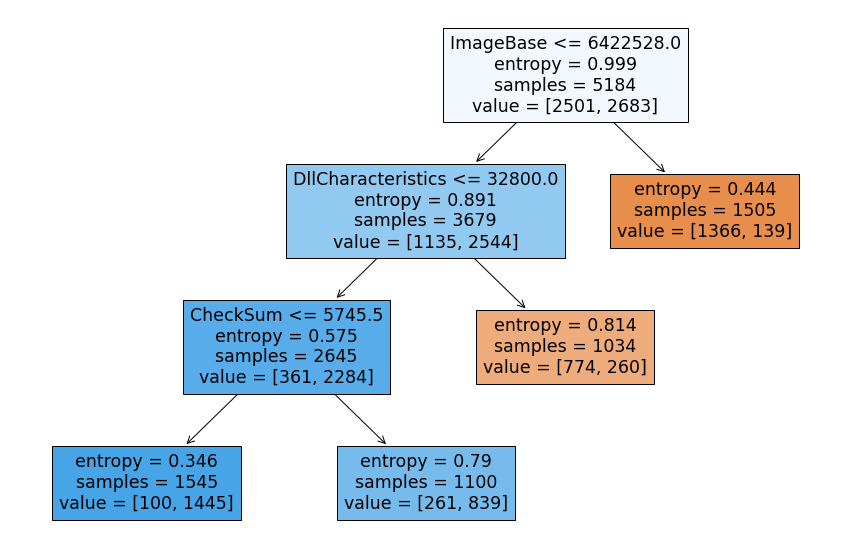

In [11]:
# Please insert your code here
# Step 1: Create a decision tree classifier with atleast 1000 samples per leaf node (1 point)
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000)
# Step 2 : Learn the decision tree using the train set (1 point)
model.fit(X,Y)
# Step 3 : Plot the decision tree learned (1 point)
plt.figure(figsize=(15,10))
plot_tree(model, filled=True,feature_names=X_train.columns);

# Generating plots
Complete the following function that shall be reused to generate line plots in subsequent sections with approporiate labels in the legend and titles.

---
Total for this subsection : **2 points**

---





In [12]:
def generate_line_plots(xlist1, xlist2, ylist1, ylist2, legend1, legend2,given_title):
    """
    xlist1 : the list of values that form x axis in first plot
    ylist1 : the list of values that form y axis in first plot
    xlist2 : the list of values that form x axis in second plot
    ylist2 : the list of values that form y axis in second plot
    legend1 : label corresponding to first plot that will appear as its legend
    legend2 : label corresponding to second plot that will appear as its legend
    given_title : title for the plots
    """
    # Please feel free to add additional parameters to the function definition as necessary
    # But, provide description as given above to any additional parameter you add

    # Please insert your code here
    sns.set_theme()                             #for improoving the background.
    plt.figure(figsize = (10,8))                #Setting the plot size. 
    sns.lineplot(x = xlist1, y = ylist1)        #Generating line plots via seaborn
    sns.lineplot(x = xlist2, y = ylist2)
    plt.legend([legend1, legend2])              #Plotting the legend.
    plt.title(given_title)
    plt.show()

# Experimentation with various decision tree hyperparameters


---

You will be using the decision tree classifier defined in the sklearn package. You will be experimenting with various hyperparametrs that the package allows control over.

## Minimum number of samples per leaf


---


sklearn provides a flexibility to control the growth of the decision tree by making a split occur only when more than a certain number of samples fall under each leaf. In this section, **comment** on the effect of the various values of the minimum number of samples per leaf node on the train and test set accuracy inferred from their plot.

---
Total for this subsection : **5 points**

---





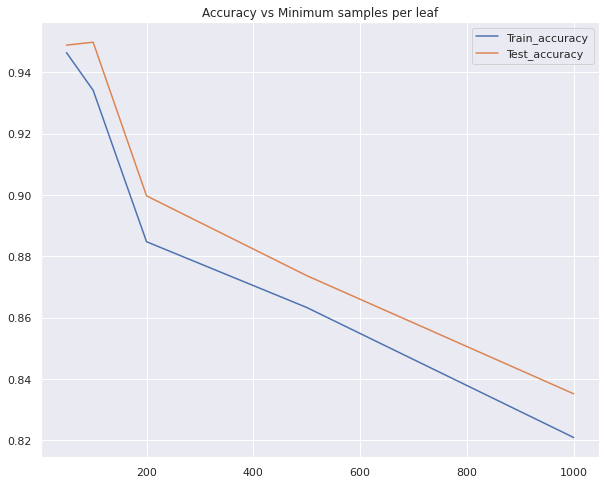

In [13]:
# Experiment with various number of leaf samples

num_samples = [50,100,200,500,1000]

train_pred = []
test_pred = []
# Please insert your code here


for num in num_samples:
    # Step 1 : Create a decision tree classifier with minimum number of samples per leaf (1 point)
    model = DecisionTreeClassifier(min_samples_leaf=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_pred.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_pred.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_samples, num_samples, train_pred, test_pred, 'Train_accuracy','Test_accuracy','Accuracy vs Minimum samples per leaf')

### Comments on the effect of minimum number of samples per leaf node on accuracy (1 point)

---

>Increasing the minimum number of data points in a  leaf, increases the randomization in the output.

>In general, for any complex model, this reduces the overfitting in the model. 
Above, both test and train accuracies are decreasing, which suggests that model did not actually overfit yet. The model is optimally fit, or is converging towards target concept.  Which means, one should not increase the minimum number data point in a leaf parameter, for the above model trained.

## Maximum number of leaf nodes in the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum number of leaf nodes a tree can have. In this section, **comment** on the effect of the various values of the maximum number of  leaf nodes allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

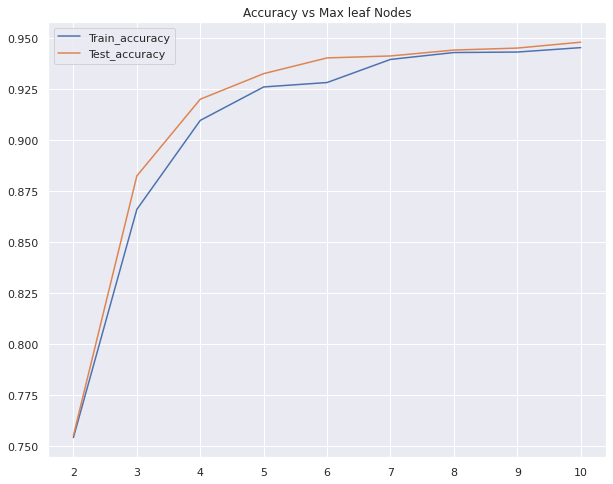

In [27]:
# Experiment with maximum number of leaf nodes

num_leaf_nodes = [i for i in range(2,11)]

#In below values of num_leaf_nodes, when our value reaches 100, we can clearly se overfitting. Our test accuracy began to decrease, 
# while training accuracy increased.
# num_leaf_nodes = [2,3,5,7,10,20,50,100,150,200,400]
train_ = []
test_ = []
# Please insert your code here


for num in num_leaf_nodes:
    # Step 1 : Create a decision tree classifier with maximum number of leaf nodes (1 point)
    model = DecisionTreeClassifier(max_leaf_nodes=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_leaf_nodes, num_leaf_nodes, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs Max leaf Nodes')

### Comments on the effect of maximum number of leaf nodes allowed on accuracy (1 point)

---
>Here, both test and train accuracy increases upon increasing maximum number of leaves. It means that, our initial model that was trained with max_leaf_nodes = 2, was underfitted. As we increased the max leafnodes, our tree gained confidence in predicting, and is hence learning.

>We allowed our tree to have more leaf splits, which means, more partitions in the predicted data distribution space. Which means, more number of homogenous class partitions. 

>Having too high value of maximum leave nodes, can cause high overfitting, as can be seen after running the above commented code. In case of overfitting, we decrease the maximum number of leave nodes, so as to introduce certain amount of randomization in our model.


## Maximum depth of the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum depth a tree can grow. In this section, **comment** on the effect of the various values of the maximum tree depth allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

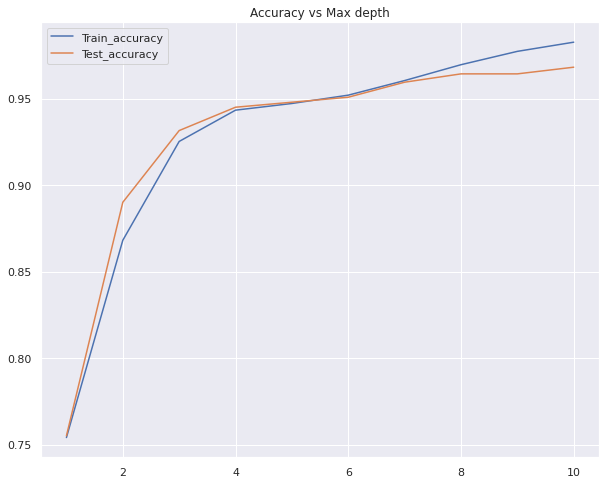

In [15]:
# Experiment with varied tree depths

tree_depths = [i for i in range(1,11)]

#We can see overfitting clearly with running the belo code. 
# tree_depths = [1,2,3,4,5,6,7,8,9,10,20,100]

train_ = []
test_ = []
# Please insert your code here


for depth in tree_depths:
    # Step 1 : Create a decision tree classifier with maximum tree depth (1 point)
    model = DecisionTreeClassifier(max_depth=depth)
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))


# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(tree_depths, tree_depths, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs Max depth')


### Comments on the effect of maximum tree depth allowed on accuracy (1 point)

---

>Here we can see that, as our tree depth increases, both test and train accuracy increases. It means our model is learning well from the data. Having more depth basically means, tree now can see more attributes while being learned. Hence it can incorporate more attributes/ factors while making any decision.

>Having too high value of depth can cause overfitting in our model.

# Random Forest

---

In this section we will explore the power of ensembles via the Random Forest classifier. We will use the sklearn package's random forest ensemble and study the effect of its hyperparameters on the model performance.

## Instance Bagging


---



To build an ensemble of different trees, a subset of instances are chosen. sklearn provides the flexibility to control the maximum number of instances a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of samples per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---





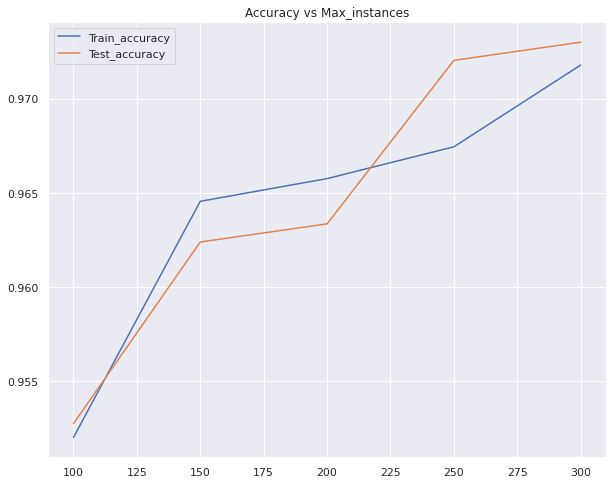

In [16]:
# Instance bagging

num_instances = [100,150,200,250,300]
#Running below code shows overfitting in the model, which can happen due to large value of max_samples.
# num_instances = [100,150,200,250,300,400,2000,3000]
train_ = []
test_ = []
# Please insert your code here



for num in num_instances:
    # Step 1 : Create a decision tree classifier with maximum number of instances in a subset (1 point)
    model = RandomForestClassifier(bootstrap=True, max_samples=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_instances, num_instances, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs Max_instances')

### Comments on the effect of maximum number of instances allowed on accuracy (1 point)

---
>We can see that, both test and train accuracy increased upon increasing the number of bagging instances. This can be seen as now, each tree is getting mode data points for training, thus can learn well. 

>We can also see that, initialy we had more than 5000 instances in the above trained decision tree. But now, the number is drastically reduced to 300 instances, with an accuracy of more tha 97 percent on test data.



## Feature Bagging


---



To build an ensemble of different trees, a subset of features are chosen. sklearn provides the flexibility to control the maximum number of features a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---

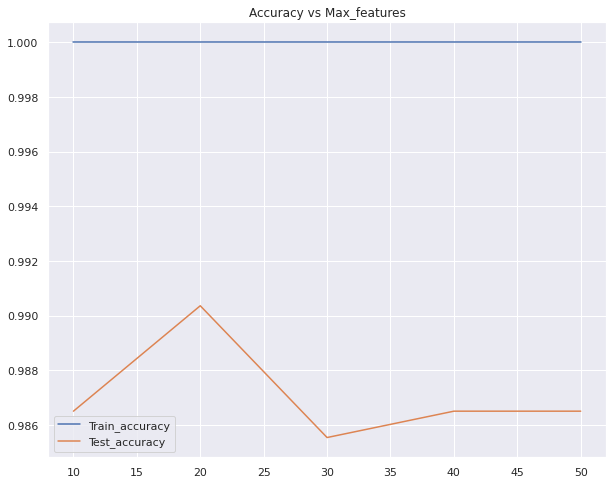

In [17]:
# Feature bagging

num_features = [10,20,30,40,50]

train_ = []
test_ = []
# Please insert your code here

for num in num_features:
    # Step 1 : Create a decision tree classifier with maximum number of features in a subset (1 point)
    model = RandomForestClassifier(criterion='entropy',max_features=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_features, num_features, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs Max_features')

### Comments on the effect of maximum number of features allowed on accuracy (1 point) 

---

Above, the train accuracy is costant, while the test accuracy is clearly decreasing. This indicates that our model is overfitting as the number of nodes are increased in a node.

## Number of trees in the ensemble


---
In this section, we will explore the flexibilitity to control the number of decision trees that can be a part of the Random Forest ensemble. **Comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---


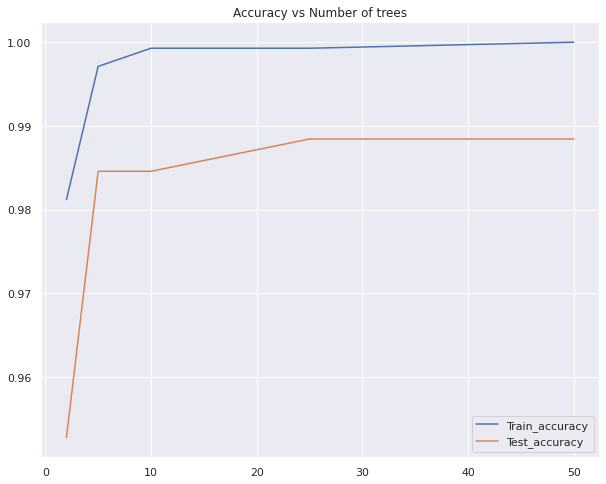

In [18]:
num_trees = [2,5,10,25,50]

train_ = []
test_ = []
# Please insert your code here



for num in num_trees:
    # Step 1 : Create a decision tree classifier with the given number of trees in an ensemble (1 point)
    model = RandomForestClassifier(n_estimators=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_trees, num_trees, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs Number of trees')

### Comments on the effect of maximum number of trees allowed on accuracy (1 point) 

---

>Above, it is visible that both test and train accuracy increased whith increase in the number of estimators (independent decision trees). 

>Random forest never overfits. Thus having more number of estimators in a model, will never overfit the model. But, it may happen that identical trees start producing after a certain limit, where accuracy becomes constant with number of estimators.

# Logistic Regression

---

In this section we will apply logistic regression to classify whether malware is present or not. We will experiment with a few hyperparameters that can be flexibly tuned in the sklearn package.

## Effect of regulaization


---
Points for this subsection : **5 points**


---

In the course, we have studied two types of regularization based on the norm applied, namely L1 and L2 regularization. **Comment** on the effect of regularization applied on the accuracy based on suitable plots.



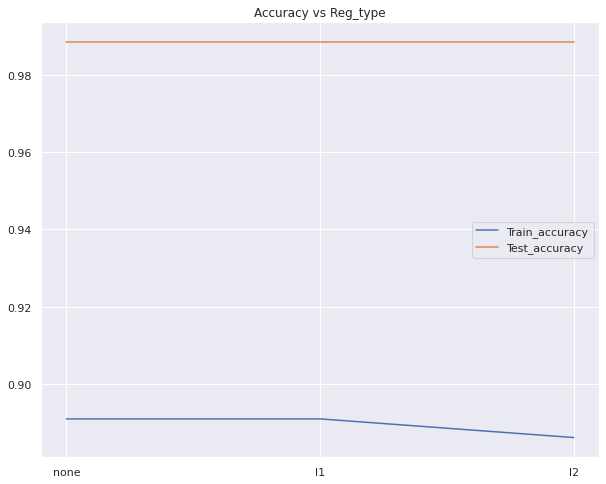

In [19]:
regularization_types = ['none','l1','l2']
train_ = []
test_ = []
# Please insert your code here


for reg_type in regularization_types:
    # Step 1 : Create a logistic regression classifier with the given regularization type (1 point)
    if reg_type == 'none':
      model  = LogisticRegression(penalty=reg_type,max_iter=5000) 
      #I've here used our sag (stochastic aggregate gradient descent solver, which works for non penalty.)    
    
    else:
      model  = LogisticRegression(penalty=reg_type,solver = 'liblinear',max_iter=5000)
      #In case of L1 and L2, I've used liblinear solver as it is our normal coordinate descent. Though, it doesn't work for none regularization.

    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(regularization_types, regularization_types, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs Reg_type')

### Comments on the effect of regularization type on accuracy (1 point) 

---
>We can see above that, test accuracy is constant throughout about(98 %), though our train accuracy has decreased by a very less margin. Regularization helps when our model is overfit. Above, we can infer that our model is not overfit yet. And so regularization does not have any effect on our model.

## Effect of regularization weight


---
sklearn applies L2 regularization on its logistic regression classifier by default. There is a flexibility to tune the weight applied to this regularization term. In this section, **comment** on the effect of different values of the regularization weight parameter on the accuracy as inferred from their plot.


---

Total for this subsection : **5 points**

---






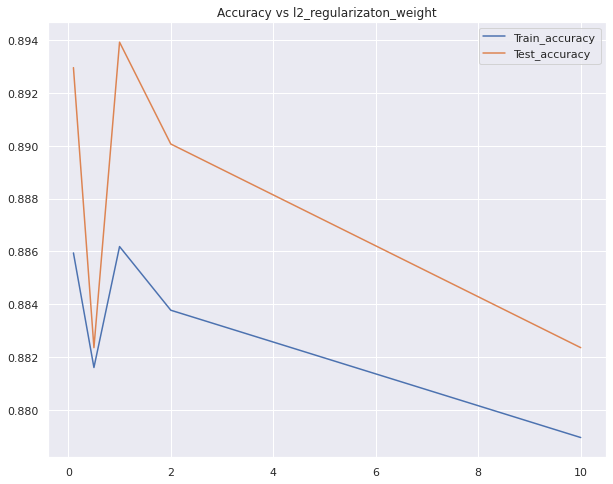

In [20]:
regularization_wts = [0.1,0.5,1,2,10]


# Please insert your code here
train_ = []
test_ = []



for wt in regularization_wts:
    # Step 1 : Create a logistic regression classifier with the given regularization weight (1 point)
    model = LogisticRegression(penalty='l2', C = wt, max_iter = 1000, solver = 'liblinear')
    # Step 2 : Learn the decision tree using the train set (1 point)
    model.fit(X_train, Y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    pred = model.predict(X_train)
    train_.append(accuracy_score(Y_train, pred))
    # Step 4 : Compute test accuracy in % (0.5 points)
    pred_ = model.predict(X_test)
    test_.append(accuracy_score(Y_test, pred_))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(regularization_wts, regularization_wts, train_, test_, 'Train_accuracy','Test_accuracy','Accuracy vs l2_regularizaton_weight')

### Comments on the effect of regularization weights on accuracy (1 point) 

---


>Increasing the weight of regularization parameter increases the amount of regularization. It tends to reduce overfitting in our model. But having too large value of lambda_ parameter introduces underfitting in our model.

>Here we can see that, initially, both test and train accuracy increased. Which means model did improove. But then, accuracy started decreasing, which may indicate that our model started underfit.